In [ ]:
import shapely.geometry
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt
from datetime import datetime
import time
import copy

import math
import IPython
import pickle
import os

In [ ]:
# ais
with open('./files/ais_0204.pkl', 'rb') as f:
    ais = pd.read_pickle(f)

In [ ]:
#좌표 v가 속하는 그리드의 키값 반환
def find_grid_key(llist, v):
    result = -1
    for i in range(0, len(llist)-1):
        if llist[i] <= v and llist[i+1] >= v:
            return llist[i]
    return result

In [ ]:
def find_grid_idx(llist, v):
    result = -1
    for i in range(0, len(llist)-1):
        if llist[i] <= v and llist[i+1] >= v:
            return i
    return result

#날씨 구역 할당

In [ ]:
def insert_data_weather(grid_map, grid_lat, grid_lon, grid_lat_lon_keys):
    classify_area(grid_map, grid_lat, grid_lon)
    distribute_area(grid_map, grid_lat, grid_lon)

    insert_weather_to_grid(grid_map, jeju_weather_ts, "jejuport")
    insert_weather_to_grid(grid_map, hyeobjae_weather_ts, "hyeobjae")
    insert_weather_to_grid(grid_map, yeonglag_weather_ts, "yeonglag")
    insert_weather_to_grid(grid_map, gapado_weather_ts, "gapado")
    insert_weather_to_grid(grid_map, jungmun_weather_ts, "jungmun")
    insert_weather_to_grid(grid_map, sinsan_weather_ts, "sinsan")
    insert_weather_to_grid(grid_map, udo_weather_ts, "udo")
    insert_weather_to_grid(grid_map, gimnyeong_weather_ts, "gimnyeong")
    insert_weather_to_grid(grid_map, goheung_weather_ts, "goheung")
    insert_weather_to_grid(grid_map, chodo_weather_ts, "chodo")
    insert_weather_to_grid(grid_map, cheongsando_weather_ts, "cheongsando")
    insert_weather_to_grid(grid_map, nohwado_weather_ts, "nohwado")
    insert_weather_to_grid(grid_map, chujado_weather_ts, "chujado")
    insert_weather_to_grid(grid_map, maenggolsudo_weather_ts, "maenggolsudo")
    insert_weather_to_grid(grid_map, jodo_weather_ts, "jodo",)
    insert_weather_to_grid(grid_map, bulmudo_weather_ts, "bulmudo")
    insert_weather_to_grid(grid_map, okdo_weather_ts, "okdo")
    insert_weather_to_grid(grid_map, jindo_weather_ts, "jindo")
    insert_weather_to_grid(grid_map, jaeun_weather_ts, "jaeun")

In [ ]:
# 날씨 데이터가 존재하는 영역 좌표
locations = [
    ([33.52530556, 126.49393889], "jejuport"),
    ([33.4005, 126.2091], "hyeobjae"),
    ([33.23861111, 126.1947222], "yeonglag"),
    ([33.16263889, 126.2639], "gapado"),
    ([33.22537, 126.39277], "jungmun"),
    ([33.37778, 126.90583], "sinsan"),
    ([33.52222222, 126.96700001], "udo"),
    ([33.5817, 126.7636], "gimnyeong"),
    ([34.3753, 127.1786], "goheung"),
    ([34.15111111, 127.21805556], "chodo"),
    ([34.13805556, 126.74416667], "cheongsando"),
    ([34.2417, 126.4917], "nohwado"),
    ([33.97305556, 126.27833333], "chujado"),
    ([34.22597, 125.9547], "maenggolsudo"),
    ([34.28722222, 126.1152778], "jodo"),
    ([34.31777778, 126.1741667], "bulmudo"),
    ([34.69277778, 126.05555556], "okdo"),
    ([34.4425, 126.05694444], "jindo"),
    ([34.91917, 125.86806], "jaeun")
]

In [ ]:
# 좌표에 해당하는 그리드에 날씨 영역 이름 할당
assigned_grids = []
def classify_area(grid_map, grid_lat, grid_lon):
    for loc, name in locations:
        lat_idx = find_grid_idx(grid_lat, loc[0])
        lon_idx = find_grid_idx(grid_lon, loc[1])

        if lat_idx != -1 and lon_idx != -1:
            #print(name, " : ", grid_lon[lon_idx], grid_lat[lat_idx])
            key = '(%f,%f)' % (grid_lat[lat_idx], grid_lon[lon_idx])
            if key in grid_map:
                grid_map[key][8] = name
            assigned_grids.append((grid_lat[lat_idx], grid_lon[lon_idx], name))  # 할당된 그리드 정보 수집

jejuport  :  126.48412698412699 33.517857142857146
hyeobjae  :  126.20899470899471 33.392857142857146
yeonglag  :  126.18783068783068 33.232142857142854
gapado  :  126.26190476190476 33.160714285714285
jungmun  :  126.38888888888889 33.223214285714285
sinsan  :  126.89682539682539 33.375
udo  :  126.96031746031746 33.517857142857146
gimnyeong  :  126.75925925925925 33.580357142857146
goheung  :  127.17195767195767 34.375
chodo  :  127.21428571428571 34.142857142857146
cheongsando  :  126.73809523809524 34.13392857142857
nohwado  :  126.48412698412699 34.24107142857143
chujado  :  126.27248677248677 33.964285714285715
maenggolsudo  :  125.94444444444444 34.223214285714285
jodo  :  126.1137566137566 34.285714285714285
bulmudo  :  126.16666666666667 34.3125
okdo  :  126.05026455026454 34.6875
jindo  :  126.05026455026454 34.4375
jaeun  :  125.85978835978835 34.910714285714285


In [ ]:
# 날씨 영역이 할당되지 않은 그리드에 가장 가까운 그리드의 이름 할당
def distribute_area(grid_map, grid_lat, grid_lon):
    for ilon in range(len(grid_lon) - 1):
        for ilat in range(len(grid_lat) - 1):
                key = '(%f,%f)' % (grid_lat[ilat], grid_lon[ilon])
                if key in grid_map and grid_map[key][8] == '':  # 이름이 할당되지 않은 그리드
                    min_distance = float('inf')
                    closest_name = None

                    for assigned_grid in assigned_grids:
                        assigned_lat, assigned_lon, name = assigned_grid
                        distance = euclidean_distance(grid_lat[ilat], grid_lon[ilon], assigned_lat, assigned_lon)
                        if distance < min_distance:
                            min_distance = distance
                            closest_name = name

                    if closest_name:
                        # 해당 시간대에 이름 할당
                        grid_map[key][8] = closest_name  # 가장 가까운 이름 할당

In [ ]:
# 19개 좌표에 대한 색상 정의 (시각화에 사용)
colors = {
    "jejuport": "yellow",
    "hyeobjae": "orange",
    "yeonglag": "red",
    "gapado": "green",
    "jungmun": "blue",
    "sinsan": "purple",
    "udo": "pink",
    "gimnyeong": "black",
    "goheung": "magenta",
    "chodo": "brown",
    "cheongsando": "olive",
    "nohwado": "lime",
    "chujado": "coral",
    "maenggolsudo": "gold",
    "jodo": "silver",
    "bulmudo": "navy",
    "okdo": "teal",
    "jindo": "aqua",
    "jaeun": "violet"
}

In [ ]:
# 유클리디안 거리 계산 함수
def euclidean_distance(lat1, lon1, lat2, lon2):
    return math.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)

In [ ]:
# 제주항 날씨데이터
skiprow_weather_count = 1
f = open('./data/weather/제주항.csv', 'r', encoding='cp949')
for i in range(0, skiprow_weather_count):
    line = f.readline()
    if not line: break
f.close()

jeju_weather = pd.read_csv('./data/weather/제주항.csv',
                          encoding='cp949', sep='\s+|,', engine='python', skiprows=range(0, skiprow_weather_count),
                          names=['지점', '일자', '시간', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)'])

#날씨데이터 중 빈칸이 존재하는 행 제거
jeju_weather = jeju_weather.dropna()

#ais['일자']와 일치하는 데이터만 추출
jeju_weather = jeju_weather[jeju_weather['일자'].isin(ais['일자'])]

지점,일시,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)

Data len in Jejuport:1384
Data len in Jejuport NN: 1384
Data len in Jejuport 200204 : 24


In [ ]:
# 협재 날씨데이터
f = open('./data/weather/협재.csv', 'r', encoding='cp949')
for i in range(0, skiprow_weather_count):
    line = f.readline()
    if not line: break
f.close()

hyeobjae_weather = pd.read_csv('./data/weather/협재.csv',
                          encoding='cp949', sep='\s+|,', engine='python', skiprows=range(0, skiprow_weather_count),
                          names=['지점', '일자', '시간', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)'])


#날씨데이터 중 빈칸이 존재하는 행 제거
hyeobjae_weather = hyeobjae_weather.dropna()

#ais['일자']와 일치하는 데이터만 추출
hyeobjae_weather = hyeobjae_weather[hyeobjae_weather['일자'].isin(ais['일자'])]


지점,일시,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)

Data len in Hyeobjae:1378
Data len in Hyeobjae NN: 1207
Data len in Hyeobjae 200204 : 24


In [ ]:
# 영락 날씨데이터
f = open('./data/weather/영락.csv', 'r', encoding='cp949')
for i in range(0, skiprow_weather_count):
    line = f.readline()
    if not line: break
f.close()

yeonglag_weather = pd.read_csv('./data/weather/영락.csv',
                          encoding='cp949', sep='\s+|,', engine='python', skiprows=range(0, skiprow_weather_count),
                          names=['지점', '일자', '시간', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)'])


#날씨데이터 중 빈칸이 존재하는 행 제거
yeonglag_weather = yeonglag_weather.dropna()

#ais['일자']와 일치하는 데이터만 추출
yeonglag_weather = yeonglag_weather[yeonglag_weather['일자'].isin(ais['일자'])]


지점,일시,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)

Data len in Yeonglag:1366
Data len in Yeonglag NN: 1312
Data len in Yeonglag 200204 : 24


In [ ]:
# 가파도 날씨데이터
f = open('./data/weather/가파도.csv', 'r', encoding='cp949')
for i in range(0, skiprow_weather_count):
    line = f.readline()
    if not line: break
f.close()

gapado_weather = pd.read_csv('./data/weather/가파도.csv',
                          encoding='cp949', sep='\s+|,', engine='python', skiprows=range(0, skiprow_weather_count),
                          names=['지점', '일자', '시간', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)'])

#날씨데이터 중 빈칸이 존재하는 행 제거
gapado_weather = gapado_weather.dropna()

#ais['일자']와 일치하는 데이터만 추출
gapado_weather = gapado_weather[gapado_weather['일자'].isin(ais['일자'])]


지점,일시,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)

Data len in Gapado:1382
Data len in Gapado NN: 1382
Data len in Gapado 200204 : 24


In [ ]:
# 중문 날씨데이터
f = open('./data/weather/중문.csv', 'r', encoding='cp949')
for i in range(0, skiprow_weather_count):
    line = f.readline()
    if not line: break
f.close()

jungmun_weather = pd.read_csv('./data/weather/중문.csv',
                          encoding='cp949', sep='\s+|,', engine='python', skiprows=range(0, skiprow_weather_count),
                          names=['지점', '일자', '시간', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)'])


#날씨데이터 중 빈칸이 존재하는 행 제거
jungmun_weather = jungmun_weather.dropna()

#ais['일자']와 일치하는 데이터만 추출
jungmun_weather = jungmun_weather[jungmun_weather['일자'].isin(ais['일자'])]


지점,일시,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)

Data len in Jungmun:1382
Data len in Jungmun NN: 1382
Data len in Jungmun 200204 : 24


In [ ]:
# 신산 날씨데이터
f = open('./data/weather/신산.csv', 'r', encoding='cp949')
for i in range(0, skiprow_weather_count):
    line = f.readline()
    if not line: break
f.close()

sinsan_weather = pd.read_csv('./data/weather/신산.csv',
                          encoding='cp949', sep='\s+|,', engine='python', skiprows=range(0, skiprow_weather_count),
                          names=['지점', '일자', '시간', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)'])


#날씨데이터 중 빈칸이 존재하는 행 제거
sinsan_weather = sinsan_weather.dropna()

#ais['일자']와 일치하는 데이터만 추출
sinsan_weather = sinsan_weather[sinsan_weather['일자'].isin(ais['일자'])]


지점,일시,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)

Data len in Sinsan:1364
Data len in Sinsan NN: 1297
Data len in Sinsan 200204 : 24


In [ ]:
# 우도 날씨데이터
f = open('./data/weather/우도.csv', 'r', encoding='cp949')
for i in range(0, skiprow_weather_count):
    line = f.readline()
    if not line: break
f.close()

udo_weather = pd.read_csv('./data/weather/우도.csv',
                          encoding='cp949', sep='\s+|,', engine='python', skiprows=range(0, skiprow_weather_count),
                          names=['지점', '일자', '시간', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)'])


#날씨데이터 중 빈칸이 존재하는 행 제거
udo_weather = udo_weather.dropna()

#ais['일자']와 일치하는 데이터만 추출
udo_weather = udo_weather[udo_weather['일자'].isin(ais['일자'])]


지점,일시,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)

Data len in Udo:1385
Data len in Udo NN: 1385
Data len in Udo 200204 : 24


In [ ]:
# 김녕 날씨데이터
f = open('./data/weather/김녕.csv', 'r', encoding='cp949')
for i in range(0, skiprow_weather_count):
    line = f.readline()
    if not line: break
f.close()

gimnyeong_weather = pd.read_csv('./data/weather/김녕.csv',
                          encoding='cp949', sep='\s+|,', engine='python', skiprows=range(0, skiprow_weather_count),
                          names=['지점', '일자', '시간', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)'])


#날씨데이터 중 빈칸이 존재하는 행 제거
gimnyeong_weather = gimnyeong_weather.dropna()

#ais['일자']와 일치하는 데이터만 추출
gimnyeong_weather = gimnyeong_weather[gimnyeong_weather['일자'].isin(ais['일자'])]


지점,일시,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)

Data len in Gimnyeong:1373
Data len in Gimnyeong NN: 1110
Data len in Gimnyeong 200204 : 24


In [ ]:
# 고흥 날씨데이터
f = open('./data/weather/고흥.csv', 'r', encoding='cp949')
for i in range(0, skiprow_weather_count):
    line = f.readline()
    if not line: break
f.close()

goheung_weather = pd.read_csv('./data/weather/고흥.csv',
                          encoding='cp949', sep='\s+|,', engine='python', skiprows=range(0, skiprow_weather_count),
                          names=['지점', '일자', '시간', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)'])


#날씨데이터 중 빈칸이 존재하는 행 제거
goheung_weather = goheung_weather.dropna()

#ais['일자']와 일치하는 데이터만 추출
goheung_weather = goheung_weather[goheung_weather['일자'].isin(ais['일자'])]


지점,일시,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)

Data len in Goheung:1367
Data len in Goheung NN: 1367
Data len in Goheung 200204 : 24


In [ ]:
# 초도 날씨데이터
f = open('./data/weather/초도.csv', 'r', encoding='cp949')
for i in range(0, skiprow_weather_count):
    line = f.readline()
    if not line: break
f.close()

chodo_weather = pd.read_csv('./data/weather/초도.csv',
                          encoding='cp949', sep='\s+|,', engine='python', skiprows=range(0, skiprow_weather_count),
                          names=['지점', '일자', '시간', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)'])


#날씨데이터 중 빈칸이 존재하는 행 제거
chodo_weather = chodo_weather.dropna()

#ais['일자']와 일치하는 데이터만 추출
chodo_weather = chodo_weather[chodo_weather['일자'].isin(ais['일자'])]


지점,일시,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)

Data len in Chodo:1383
Data len in Chodo NN: 1383
Data len in Chodo 200204 : 24


In [ ]:
# 청산도 날씨데이터
f = open('./data/weather/청산도.csv', 'r', encoding='cp949')
for i in range(0, skiprow_weather_count):
    line = f.readline()
    if not line: break
f.close()

cheongsando_weather = pd.read_csv('./data/weather/청산도.csv',
                          encoding='cp949', sep='\s+|,', engine='python', skiprows=range(0, skiprow_weather_count),
                          names=['지점', '일자', '시간', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)'])


#날씨데이터 중 빈칸이 존재하는 행 제거
cheongsando_weather = cheongsando_weather.dropna()

#ais['일자']와 일치하는 데이터만 추출
cheongsando_weather = cheongsando_weather[cheongsando_weather['일자'].isin(ais['일자'])]


지점,일시,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)

Data len in Gimnyeong:1388
Data len in Cheongsando NN: 1388
Data len in Cheongsando 200204 : 24


In [ ]:
# 노화도 날씨데이터
f = open('./data/weather/노화도.csv', 'r', encoding='cp949')
for i in range(0, skiprow_weather_count):
    line = f.readline()
    if not line: break
f.close()

nohwado_weather = pd.read_csv('./data/weather/노화도.csv',
                          encoding='cp949', sep='\s+|,', engine='python', skiprows=range(0, skiprow_weather_count),
                          names=['지점', '일자', '시간', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)'])


#날씨데이터 중 빈칸이 존재하는 행 제거
nohwado_weather = nohwado_weather.dropna()

#ais['일자']와 일치하는 데이터만 추출
nohwado_weather = nohwado_weather[nohwado_weather['일자'].isin(ais['일자'])]


지점,일시,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)

Data len in Nohwado:1336
Data len in Nohwado NN: 1336
Data len in Nohwado 200204 : 23


In [ ]:
# 추자도 날씨데이터
f = open('./data/weather/추자도.csv', 'r', encoding='cp949')
for i in range(0, skiprow_weather_count):
    line = f.readline()
    if not line: break
f.close()

chujado_weather = pd.read_csv('./data/weather/추자도.csv',
                          encoding='cp949', sep='\s+|,', engine='python', skiprows=range(0, skiprow_weather_count),
                          names=['지점', '일자', '시간', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)'])


#날씨데이터 중 빈칸이 존재하는 행 제거
chujado_weather = chujado_weather.dropna()

#ais['일자']와 일치하는 데이터만 추출
chujado_weather = chujado_weather[chujado_weather['일자'].isin(ais['일자'])]


지점,일시,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)

Data len in Chujado:1377
Data len in Chujado NN: 1377
Data len in Chujado 200204 : 24


In [ ]:
# 맹골수도 날씨데이터
f = open('./data/weather/맹골수도.csv', 'r', encoding='cp949')
for i in range(0, skiprow_weather_count):
    line = f.readline()
    if not line: break
f.close()

maenggolsudo_weather = pd.read_csv('./data/weather/맹골수도.csv',
                          encoding='cp949', sep='\s+|,', engine='python', skiprows=range(0, skiprow_weather_count),
                          names=['지점', '일자', '시간', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)'])


#날씨데이터 중 빈칸이 존재하는 행 제거
maenggolsudo_weather = maenggolsudo_weather.dropna()

#ais['일자']와 일치하는 데이터만 추출
maenggolsudo_weather = maenggolsudo_weather[maenggolsudo_weather['일자'].isin(ais['일자'])]


지점,일시,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)

Data len in Maenggolsudo:1385
Data len in Maenggolsudo NN: 1385
Data len in Maenggolsudo 200204 : 24


In [ ]:
# 조도 날씨데이터
f = open('./data/weather/조도.csv', 'r', encoding='cp949')
for i in range(0, skiprow_weather_count):
    line = f.readline()
    if not line: break
f.close()

jodo_weather = pd.read_csv('./data/weather/조도.csv',
                          encoding='cp949', sep='\s+|,', engine='python', skiprows=range(0, skiprow_weather_count),
                          names=['지점', '일자', '시간', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)'])


#날씨데이터 중 빈칸이 존재하는 행 제거
jodo_weather = jodo_weather.dropna()

#ais['일자']와 일치하는 데이터만 추출
jodo_weather = jodo_weather[jodo_weather['일자'].isin(ais['일자'])]


지점,일시,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)

Data len in Jodo:1291
Data len in Jodo NN: 1291
Data len in Jodo 200204 : 24


In [ ]:
# 불무도 날씨데이터
f = open('./data/weather/불무도.csv', 'r', encoding='cp949')
for i in range(0, skiprow_weather_count):
    line = f.readline()
    if not line: break
f.close()

bulmudo_weather = pd.read_csv('./data/weather/불무도.csv',
                          encoding='cp949', sep='\s+|,', engine='python', skiprows=range(0, skiprow_weather_count),
                          names=['지점', '일자', '시간', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)'])


#날씨데이터 중 빈칸이 존재하는 행 제거
bulmudo_weather = bulmudo_weather.dropna()

#ais['일자']와 일치하는 데이터만 추출
bulmudo_weather = bulmudo_weather[bulmudo_weather['일자'].isin(ais['일자'])]


지점,일시,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)

Data len in Bulmudo:1353
Data len in Bulmudo NN: 1353
Data len in Bulmudo 200204 : 24


In [ ]:
# 옥도 날씨데이터
f = open('./data/weather/옥도.csv', 'r', encoding='cp949')
for i in range(0, skiprow_weather_count):
    line = f.readline()
    if not line: break
f.close()

okdo_weather = pd.read_csv('./data/weather/옥도.csv',
                          encoding='cp949', sep='\s+|,', engine='python', skiprows=range(0, skiprow_weather_count),
                          names=['지점', '일자', '시간', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)'])


#날씨데이터 중 빈칸이 존재하는 행 제거
okdo_weather = okdo_weather.dropna()

#ais['일자']와 일치하는 데이터만 추출
okdo_weather = okdo_weather[okdo_weather['일자'].isin(ais['일자'])]


지점,일시,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)

Data len in Okdo:1352
Data len in Okdo NN: 1352
Data len in Okdo 200204 : 24


In [ ]:
# 진도 날씨데이터
f = open('./data/weather/진도.csv', 'r', encoding='cp949')
for i in range(0, skiprow_weather_count):
    line = f.readline()
    if not line: break
f.close()

jindo_weather = pd.read_csv('./data/weather/진도.csv',
                          encoding='cp949', sep='\s+|,', engine='python', skiprows=range(0, skiprow_weather_count),
                          names=['지점', '일자', '시간', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)'])


#날씨데이터 중 빈칸이 존재하는 행 제거
jindo_weather = jindo_weather.dropna()

#ais['일자']와 일치하는 데이터만 추출
jindo_weather = jindo_weather[jindo_weather['일자'].isin(ais['일자'])]


지점,일시,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)

Data len in Jindo:1329
Data len in Jindo NN: 1314
Data len in Jindo 200204 : 23


In [ ]:
# 자은 날씨데이터
f = open('./data/weather/자은.csv', 'r', encoding='cp949')
for i in range(0, skiprow_weather_count):
    line = f.readline()
    if not line: break
f.close()

jaeun_weather = pd.read_csv('./data/weather/자은.csv',
                          encoding='cp949', sep='\s+|,', engine='python', skiprows=range(0, skiprow_weather_count),
                          names=['지점', '일자', '시간', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)'])


#날씨데이터 중 빈칸이 존재하는 행 제거
jaeun_weather = jaeun_weather.dropna()

#ais['일자']와 일치하는 데이터만 추출
jaeun_weather = jaeun_weather[jaeun_weather['일자'].isin(ais['일자'])]


지점,일시,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)

Data len in Jaeun:1048
Data len in Jaeun NN: 781
Data len in Jaeun 200204 : 19


In [ ]:
# 30분 단위의 시간을 해당 정각 시간으로 변환
def round_to_previous_hour(time_str):
    hour, minute = map(int, time_str.split(':'))

    # 30분 이상이라도 이전 정각으로 변환
    if minute >= 30:
        minute = 0  # 분을 00으로 설정하여 이전 정각 유지
    return f"{hour:02d}:00"  # 'HH:00'으로 변환

In [ ]:
# 시간 형식을 'HH:MM'에서 'HH:00'으로 변환
jeju_weather['시간'] = jeju_weather['시간'].apply(round_to_previous_hour)
hyeobjae_weather['시간'] = hyeobjae_weather['시간'].apply(round_to_previous_hour)
yeonglag_weather['시간'] = yeonglag_weather['시간'].apply(round_to_previous_hour)
gapado_weather['시간'] = gapado_weather['시간'].apply(round_to_previous_hour)
jungmun_weather['시간'] = jungmun_weather['시간'].apply(round_to_previous_hour)
sinsan_weather['시간'] = sinsan_weather['시간'].apply(round_to_previous_hour)
udo_weather['시간'] = udo_weather['시간'].apply(round_to_previous_hour)
gimnyeong_weather['시간'] = gimnyeong_weather['시간'].apply(round_to_previous_hour)
goheung_weather['시간'] = goheung_weather['시간'].apply(round_to_previous_hour)
chodo_weather['시간'] = chodo_weather['시간'].apply(round_to_previous_hour)
cheongsando_weather['시간'] = cheongsando_weather['시간'].apply(round_to_previous_hour)
nohwado_weather['시간'] = nohwado_weather['시간'].apply(round_to_previous_hour)
chujado_weather['시간'] = chujado_weather['시간'].apply(round_to_previous_hour)
maenggolsudo_weather['시간'] = maenggolsudo_weather['시간'].apply(round_to_previous_hour)
jodo_weather['시간'] = jodo_weather['시간'].apply(round_to_previous_hour)
bulmudo_weather['시간'] = bulmudo_weather['시간'].apply(round_to_previous_hour)
okdo_weather['시간'] = okdo_weather['시간'].apply(round_to_previous_hour)
jindo_weather['시간'] = jindo_weather['시간'].apply(round_to_previous_hour)
jaeun_weather['시간'] = jaeun_weather['시간'].apply(round_to_previous_hour)

<ipython-input-44-1622b2be35d5>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jaeun_weather['시간'] = jaeun_weather['시간'].apply(round_to_previous_hour)


In [ ]:
def ts_weather(weather_df):
    weather_ts_list = []
    time_range = pd.date_range('00:00:00', '23:59:59', freq='30min').time

    for i in range(len(time_range) - 1):
        # time_range[i]를 직접 정각으로 변환 (이미 정각으로 맞춰졌을 경우 그대로 사용)
        start_time = round_to_previous_hour(time_range[i].strftime('%H:%M'))
        df = weather_df[weather_df['시간'] == start_time]
        weather_ts_list.append(df)

    # 마지막 시간 범위 처리
    start_time = round_to_previous_hour(time_range[-1].strftime('%H:%M'))
    df = weather_df[weather_df['시간'] == start_time]
    weather_ts_list.append(df)

    return weather_ts_list

In [ ]:
jeju_weather_ts = ts_weather(jeju_weather)
hyeobjae_weather_ts = ts_weather(hyeobjae_weather)
yeonglag_weather_ts = ts_weather(yeonglag_weather)
gapado_weather_ts = ts_weather(gapado_weather)
jungmun_weather_ts = ts_weather(jungmun_weather)
sinsan_weather_ts = ts_weather(sinsan_weather)
udo_weather_ts = ts_weather(udo_weather)
gimnyeong_weather_ts = ts_weather(gimnyeong_weather)
goheung_weather_ts = ts_weather(goheung_weather)
chodo_weather_ts = ts_weather(chodo_weather)
cheongsando_weather_ts = ts_weather(cheongsando_weather)
nohwado_weather_ts = ts_weather(nohwado_weather)
chujado_weather_ts = ts_weather(chujado_weather)
maenggolsudo_weather_ts = ts_weather(maenggolsudo_weather)
jodo_weather_ts = ts_weather(jodo_weather)
bulmudo_weather_ts = ts_weather(bulmudo_weather)
okdo_weather_ts = ts_weather(okdo_weather)
jindo_weather_ts = ts_weather(jindo_weather)
jaeun_weather_ts = ts_weather(jaeun_weather)

# 그리드 별 날씨값 할당

In [ ]:
def insert_weather_to_grid(grid_map, weather_ts, area_label):
    weather_data = weather_ts[0]
    for _, row in weather_data.iterrows():
      for key in grid_map.keys():
        lat, lon = eval(key)
        if grid_map[key][8] == area_label:
          grid_map[key][9] = row['수온(°C)']
          grid_map[key][10] = row['최대파고(m)']
          grid_map[key][11] = row['유의파고(m)']
          grid_map[key][12] = row['평균파고(m)']
          grid_map[key][13] = row['파주기(sec)']

# 날씨값 퀀타일 적용, 스코어링

In [ ]:
def score_weather(grid_map, score_dic):
    for key in grid_map.keys():
        lat, lon = eval(key)

        sign_wave_height = grid_map[key][11]  # 유의파고
        wave_period = grid_map[key][13]  # 파주기

        # 너울 단계별 기준으로 점수 부여
        if sign_wave_height < 2 and wave_period < 8.0:
                weather_score = 1  # 관심단계
        elif (sign_wave_height > 2 and wave_period <= 8.0) or (sign_wave_height <= 2 and wave_period > 8.0):
                weather_score = 2  # 주의단계
        elif sign_wave_height > 2 and 8.0 <= wave_period <= 11:
                weather_score = 3  # 경계단계
        elif sign_wave_height >= 4 and wave_period > 11:
                weather_score = 4  # 위험단계

            # score_dic[key][1]에 날씨 score 저장
        if key in score_dic:
            score_dic[key][1] = weather_score

    # return score_dic

Draw Basemap
Draw Gridmap


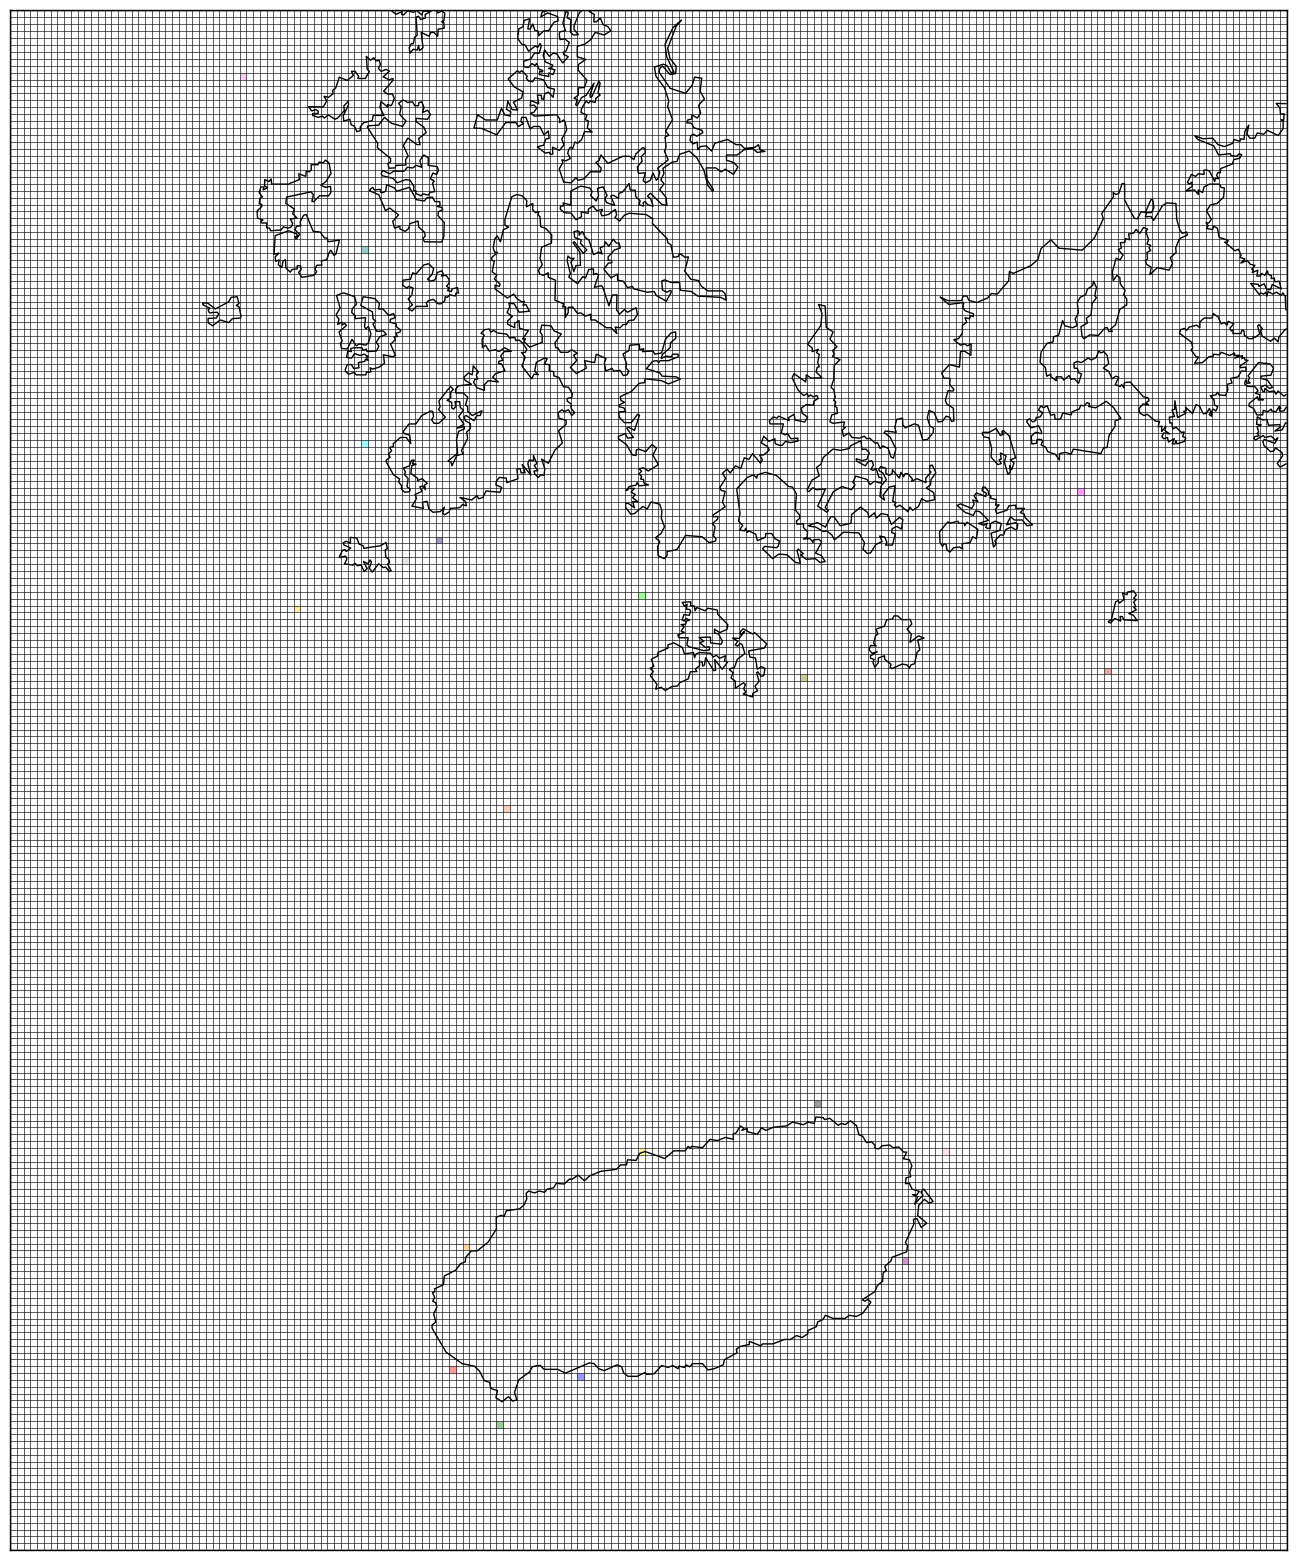

In [ ]:
# 19개 지점 시각화 코드
# print('Draw Basemap')
# f = plt.figure(figsize=[20, 20])
# m = Basemap(llcrnrlon=base_lon[0], llcrnrlat=base_lat[0],
#             urcrnrlon=base_lon[1], urcrnrlat=base_lat[1],
#             resolution='h', projection='merc')
# m.drawcoastlines()
# m.drawcountries()
# m.drawmapboundary()
# m.shadedrelief()

# print('Draw Gridmap')
# for ilon in range(1, len(grid_lon)):
#     for ilat in range(1, len(grid_lat)):
#         lats = [grid_lat[ilat-1], grid_lat[ilat], grid_lat[ilat], grid_lat[ilat-1]]
#         lons = [grid_lon[ilon-1], grid_lon[ilon-1], grid_lon[ilon], grid_lon[ilon]]
#         key = '(%f,%f)' % (grid_lat[ilat-1], grid_lon[ilon-1])

#         if key in grid_map:
#             location_name = grid_map[key][8]
#             if location_name in colors:  # 만약 해당 그리드가 19개 좌표 중 하나라면
#                 color = colors[location_name]
#                 p = draw_basemap_grid(lats, lons, m, color)
#             else:
#                 p = draw_basemap_grid(lats, lons, m, "none")